<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [ ]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

In [ ]:
df                   = pd.read_csv('titanic.csv')
describe             = df.describe()
describe.loc['Nan']  = df.isna().sum()
describe.loc['%Nan'] = (df.isna().mean())*100
describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

In [ ]:
df_copy = df.drop(columns=['Ticket', 'PassengerId', 'Name', 'Fare', 'Cabin', 'Embarked'])

In [ ]:
df_copy

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [ ]:
# Alumno, elimine aquellas filas que tengan columnas vacias

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

In [ ]:
df_copy.shape

(714, 6)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [ ]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [ ]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

In [ ]:
df_copy['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

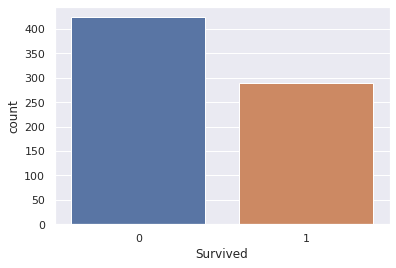

In [ ]:
sns.set_theme(style="darkgrid")
survived = sns.countplot(data=df_copy, x="Survived")

In [ ]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

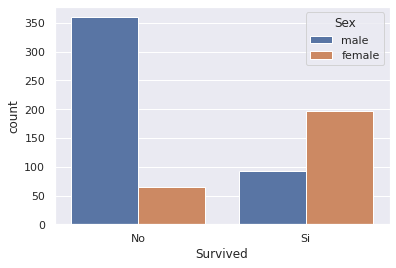

In [ ]:
survived_gender = sns.countplot(x=df_copy['Survived'].replace({0: 'No', 1: 'Si'}), hue=df_copy['Sex'])

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

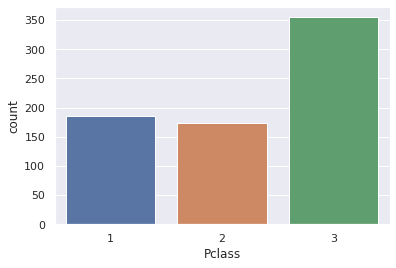

In [ ]:
clases = sns.countplot(data=df_copy, x="Pclass")

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

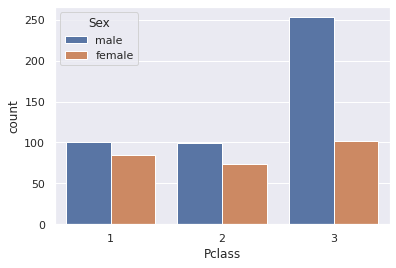

In [ ]:
class_gender = sns.countplot(x=df_copy['Pclass'], hue=df_copy['Sex'])

In [ ]:
df_copy

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


#### Transformar variables categóricas texto a clases numeradas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

In [ ]:
df_cod = df_copy

In [ ]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

In [ ]:
label_encoder = LabelEncoder()
label_encoding = label_encoder.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [ ]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

In [ ]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [ ]:
# Alumno, genere un numpy array "X" que posea todos los features (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

In [ ]:
X = df_cod.drop(columns='Survived').values
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [ ]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

In [ ]:
#RandomForest

In [ ]:
from sklearn.ensemble  import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, max_depth=5, criterion='entropy', random_state = 0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [ ]:
#KNN

In [ ]:
class RandomBaseModel():
    def __init__(self):
        self.classes_ = [0, 1]
    def fit(self,X, y):
        self.classes_ = np.unique(y)
        return None

    def predict(self,X):
        rand = np.random.randint(0, len(self.classes_), size=X.shape[0])
        rand_clases = [self.classes_[x] for x in rand]
        return np.asarray(rand_clases)

In [ ]:
random_model = RandomBaseModel()
random_model.fit(X_train, y_train)
y_hat_base = random_model.predict(X_test)
random_model.classes_

array([0, 1])

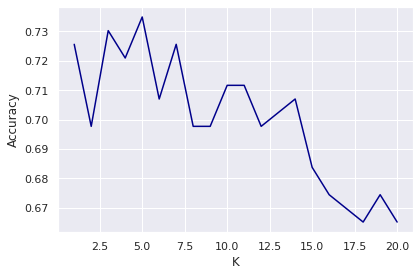

La mejor exactitud se obtuvo con 0.73 con K=5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_MAX = 20
mean_acc = np.zeros((K_MAX))

for i in range(K_MAX):
    # Entrenar el modelo
    clf2 = KNeighborsClassifier(n_neighbors=(i+1)).fit(X_train,y_train)

    # Prediccion
    y_hat = clf2.predict(X_test)   

    # Evaluar el modelo
    mean_acc[i] = accuracy_score(y_test, y_hat)

plt.plot(range(1, K_MAX+1), mean_acc,'darkBlue')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con K={mean_acc.argmax()+1}")

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)
y_hat2 = clf2.predict(X_test) 

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)

In [ ]:
#RandomForest

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7906976744186046

In [ ]:
#KNN

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat2, normalize=True)

0.7023255813953488

In [ ]:
# Alumno, dibujar la matriz de confusion

In [ ]:
#RandomForest

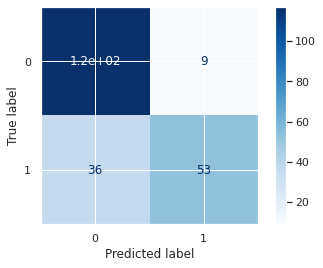

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#KNN

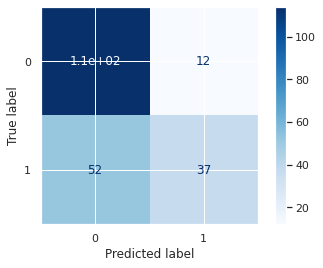

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

In [ ]:
#RandomForest

In [ ]:
Pclass = 1
Sex = 'male'
Age = 45
SibSp = 2
Parch = 3


gender_encoded = int(label_encoder.transform([Sex]))

X_prueba = np.array([Pclass, gender_encoded, Age, SibSp, Parch])

X_prueba = X_prueba.reshape(1, -1)
y_prueba = clf.predict(X_prueba)

if y_prueba == 1:
    print('Te salvaste!')
else:
    print('Te ahogaste, como Leo!')

Te ahogaste, como Leo!


In [ ]:
#KNN

In [ ]:
Pclass = 1
Sex = 'male'
Age = 45
SibSp = 2
Parch = 3


gender_encoded = int(label_encoder.transform([Sex]))

X_prueba = np.array([Pclass, gender_encoded, Age, SibSp, Parch])

X_prueba = X_prueba.reshape(1, -1)
y_prueba = clf2.predict(X_prueba)

if y_prueba == 1:
    print('Te salvaste!')
else:
    print('Te ahogaste, como Leo!')

Te ahogaste, como Leo!
